## Dataset Exploration
Descriptions of variables found within the CMS Hospital Readmissions Reduction Program dataset.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the data set
hospital_df = pd.read_csv('FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv')
hospital_df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,NaN,0.9483,13.0146,13.7235,36,07/01/2020,06/30/2023
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,NaN,0.9509,9.6899,10.1898,13,07/01/2020,06/30/2023
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,NaN,1.0597,21.5645,20.3495,151,07/01/2020,06/30/2023
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9654,4.2680,4.4211,Too Few to Report,07/01/2020,06/30/2023
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,NaN,0.9715,16.1137,16.5863,77,07/01/2020,06/30/2023


### Variable Descriptions
The 12 variables included in the CMS Hospital Readmissions Reduction Program dataset are:
1) Facility Name - Name of the medical facility at which data was collected
2) Facility ID - Identifier for the medical facility at which data was collected
3) State - State in which the facility resides
4) Measure Name - Identifier for the measure used for a given observation. The measures (direct from the CMS data dictionary) are:
    * READM-30-AMIHRRP: Excess readmission ratio for heart attack patients
    * READM-30-COPDHRRP: Excess readmission ratio for chronic obstructive pulmonary disease (COPD) patients
    * READM-30-CABGHRRP: Excess readmission ration for Coronary Artery Bypass Graft (CABG) patients
    * READM-30-HFHRRP: Excess readmission ratio for heart failure patients
    * READM-30-HIPKNEE-HRRP: Excess readmission ratio for hip/knee replacement patients
    * READM-30-PNHRRP: Excess readmission ratio for pneumonia patients
5) Number of Discharges - The number of discharges for the given measure type during the reporting period
6) Footnote - Optional inclusion of a footnote with the observation
7) Excess Readmissions Ratio - Ratio of predicted readmission rate to expected readmission rate, providing an estimate of how a facility compared to the expected rate based on the national average
8) Predicted Readmission Rate - The rate of readmissions for the given facility and measure type as predicted by hospital data
9) Expected Readmission Rate - The expected readmission rate based on the national average rate for similar patients
10) Number of Readmissions - The actual number of readmissions for the given observation
11) Start Date - Start date for the reporting period
12) End Date - End date for the reporting period

In [3]:
# Print datatypes
hospital_df.dtypes

Facility Name                  object
Facility ID                     int64
State                          object
Measure Name                   object
Number of Discharges          float64
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

### Variable Datatypes
The 12 variables have the following datatypes:
1) Facility Name - object (string)
2) Facility ID - int64 (integer id)
3) State - object (string)
4) Measure Name - object (string)
5) Number of Discharges - float54 (floating point number)
6) Footnote - float54 (floating point number)
7) Excess Readmissions Ratio - float54 (floating point number)
8) Predicted Readmission Rate - float54 (floating point number)
9) Expected Readmission Rate - float54 (floating point number)
10) Number of Readmissions - object (generally integer, although occasionally a string)
11) Start Date - object (string, can likely be cast to a datetime object)
12) End Date - object (string, can likely be cast to a datetime object)

In [4]:
# For fun, a quick description of the dataset
hospital_df.describe()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,18510.000000,8340.000000,6583.000000,11927.000000,11927.000000,11927.000000
mean,261770.055105,279.269904,3.187756,1.001719,14.995386,14.961234
std,164647.739172,266.018069,2.089167,0.080547,5.017854,4.871997
min,10001.000000,0.000000,1.000000,0.477900,1.674200,2.892100
25%,110073.000000,115.000000,1.000000,0.956550,12.533000,12.612800
50%,250048.000000,197.000000,5.000000,0.998200,16.060200,16.146000
75%,390133.000000,354.000000,5.000000,1.043000,18.609000,18.667350
max,670327.000000,4501.000000,7.000000,1.643000,27.809500,25.394200


Now, lets assess the data using ISLP 3.3 and 3.4. First, a scatter matrix.

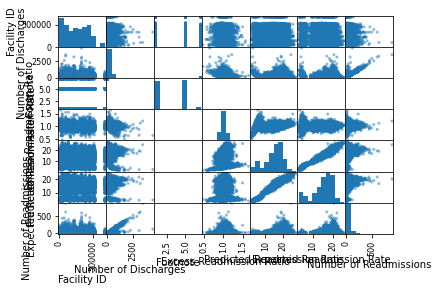

In [9]:
hospital_df['Number of Readmissions'] = pd.to_numeric(hospital_df['Number of Readmissions'], errors='coerce')
pd.plotting.scatter_matrix(hospital_df);

We can see that there is some collinearity between expected readmission rate and predicted readmission rate, this can be expected since they are calculated from similar metrics, but it is important to note. There is also a bit of collinearity between number of discharges and number of readmissions, also expected and noted. There are not any outliers or high-leverage that are super obvious, although number of discharges and number of readmissions may each have one minor outlier.

Now, lets look at some residuals.

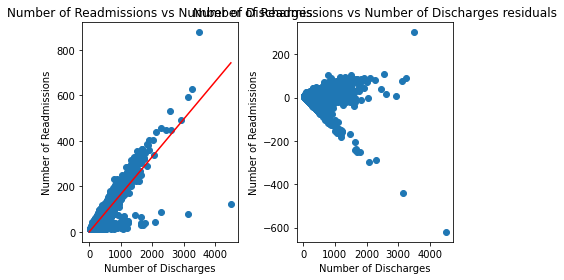

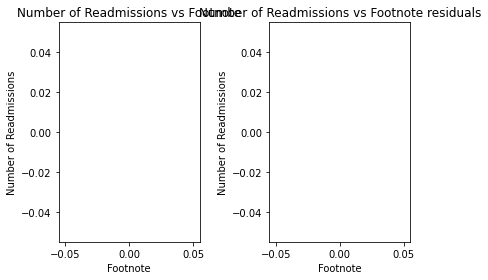

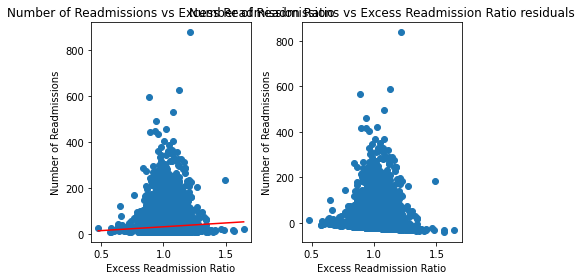

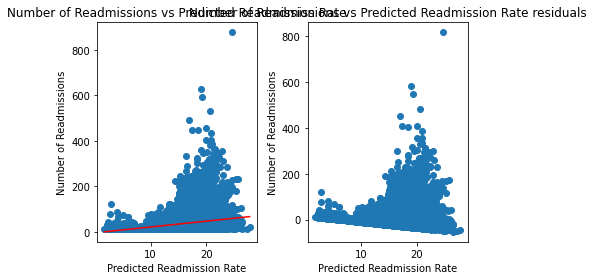

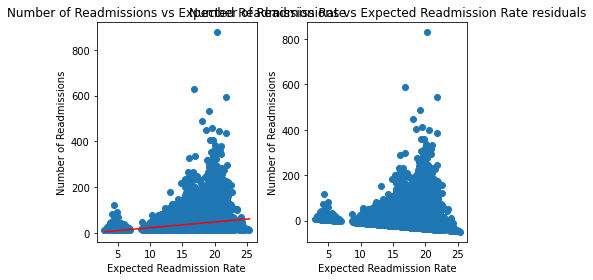

In [10]:
subset = ['Number of Discharges', 'Footnote', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate']

def get_resid(X, Y):
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_x_squared = np.sum(X ** 2)

    num = (n * sum_xy) - (sum_x * sum_y)
    denom = (n * sum_x_squared) - (sum_x ** 2)

    b_1 = num / denom
    b_0 = (sum_y - (b_1 * sum_x)) / n

    pred = (b_1 * X) + b_0

    residuals = Y - pred

    return b_1, b_0, residuals

for predictor in subset:
    b_1, b_0, residuals = get_resid(hospital_df[predictor], hospital_df['Number of Readmissions'])

    plt.subplot(1, 2, 1)
    plt.scatter( hospital_df[predictor], hospital_df['Number of Readmissions'])

    # add regression line (y = b_0 + b_1 * x or y = mx + b)
    x_vals = np.linspace(min(hospital_df[predictor]), max(hospital_df[predictor]), 100)
    y_vals = b_0 + (b_1 * x_vals)
    plt.plot(x_vals, y_vals, color='red')

    plt.title(f'Number of Readmissions vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Number of Readmissions')

    plt.subplot(1, 2, 2)
    plt.scatter( hospital_df[predictor], residuals)
    plt.title(f'Number of Readmissions vs {predictor} residuals')
    plt.xlabel(predictor)
    plt.ylabel('Number of Readmissions')

    plt.tight_layout()

    plt.show()

Some of these residuals have minor patterns, but it looks like the linear model does not fit well to the data and it it not a good representation, leading the residuals to reflect the feature patterns.